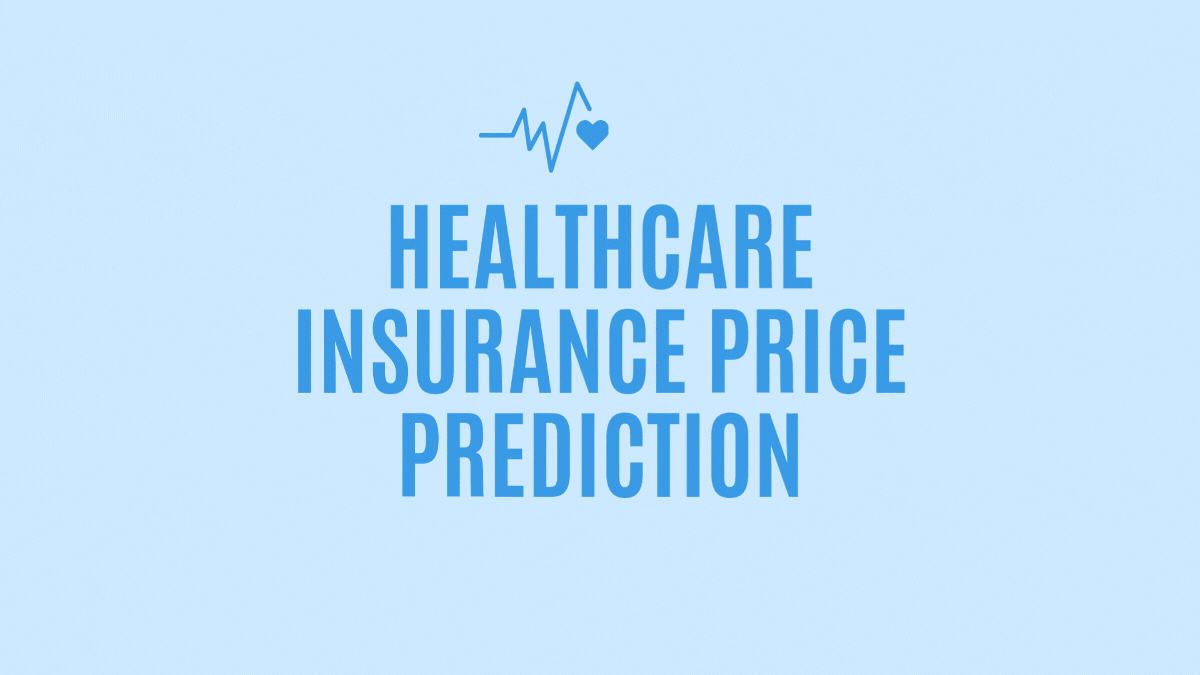
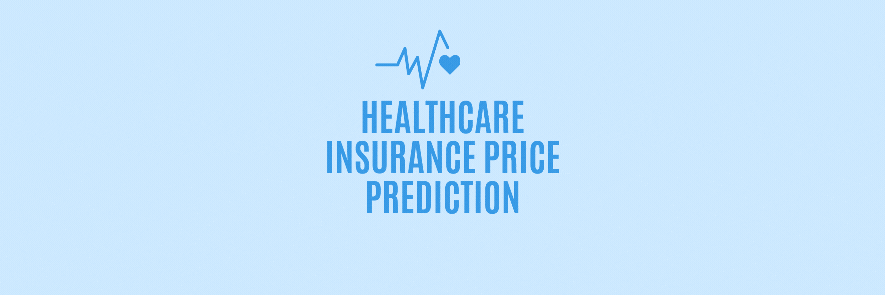

<div style="background-color: #399be6; color: white; text-align: center; padding: 15px; border-radius: 10px; font-size: 24px; font-weight: bold;">
    About The Dataset
</div>

 This dataset contains information on the relationship between personal attributes (age, gender, BMI, family size, smoking habits), geographic factors, and their impact on medical insurance charges. It can be used to study how these features influence insurance costs and develop predictive models for estimating healthcare expenses.

* **Age:** The insured person's age.
* **Sex:** Gender (male or female) of the insured.
* **BMI** (Body Mass Index): A measure of body fat based on height and weight.
* **Children:** The number of dependents covered.
* **Smoker:** Whether the insured is a smoker (yes or no).
* **Region:** The geographic area of coverage.
* **Charges:** The medical insurance costs incurred by the insured person.

## 1. Exploratory Data Analysis

In [29]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import MinMaxScaler
# train test split
from sklearn.model_selection import train_test_split
#regression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor 
from xgboost import XGBRegressor

In [30]:
# import the dataset
df = pd.read_csv('/kaggle/input/healthcare-insurance/insurance.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [31]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [32]:
# Check missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [33]:
# Check for the duplicated values
duplicate = df[df.duplicated()]
print("Duplicated Rows :")
duplicate

Duplicated Rows :


,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [34]:
# Drop the duplicated values
df.drop_duplicates(inplace=True)

## Numerical Variables 

In [35]:
numerical_columns = df.select_dtypes(include=['number'])
numerical_columns.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


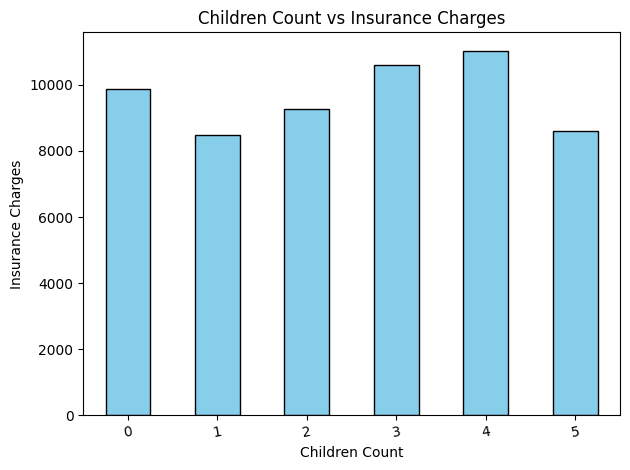

In [36]:
# Discrete Numerical Columns
numerical_columns.groupby('children')['charges'].median().plot(kind='bar', color='skyblue', edgecolor='black')

plt.xlabel('Children Count')
plt.ylabel('Insurance Charges') 
plt.title("Children Count vs Insurance Charges")  
plt.xticks(rotation= 10) 

plt.tight_layout()
plt.show()

In [37]:
def bmi_types(bmi):
    if bmi < 18.5:
        return 'Thin'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30 :
        return 'Fat'
    elif 30 <= bmi <35:
        return 'Obese (type 1)'
    else:
        return 'Obese (type 2)'

numerical_columns['bmi_types'] = df['bmi'].apply(bmi_types)
numerical_columns.head()

,age,bmi,children,charges,bmi_types
0,19,27.900,0,16884.92400,Fat
1,18,33.770,1,1725.55230,Obese (type 1)
2,28,33.000,3,4449.46200,Obese (type 1)
3,33,22.705,0,21984.47061,Normal
4,32,28.880,0,3866.85520,Fat


In [38]:
def age_groups(age):
    if  17 < age < 30:
        return 'Young Adults'
    elif 30 <= age < 45:
        return 'Adult'
    else:
        return 'Elderly'

numerical_columns['age_groups'] = df['age'].apply(age_groups)
numerical_columns.head()

,age,bmi,children,charges,bmi_types,age_groups
0,19,27.900,0,16884.92400,Fat,Young Adults
1,18,33.770,1,1725.55230,Obese (type 1),Young Adults
2,28,33.000,3,4449.46200,Obese (type 1),Young Adults
3,33,22.705,0,21984.47061,Normal,Adult
4,32,28.880,0,3866.85520,Fat,Adult


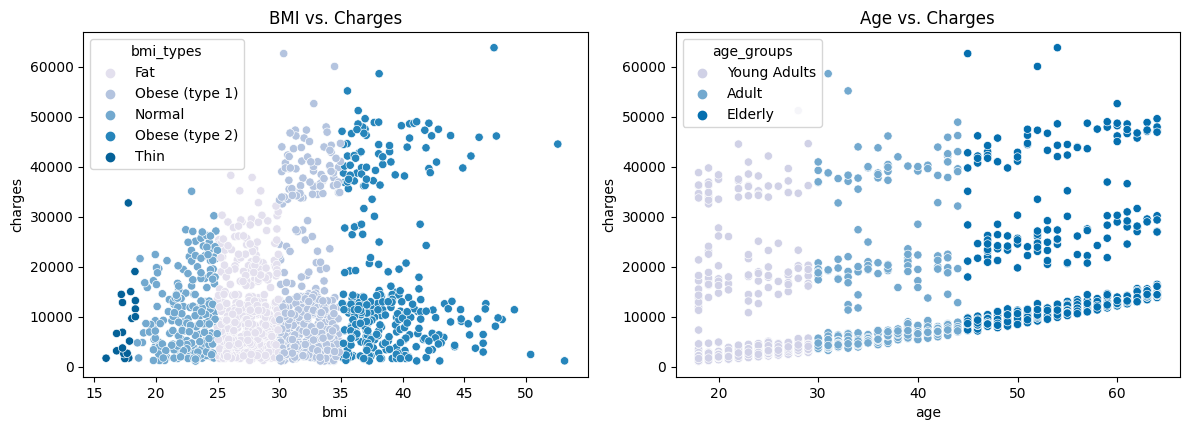

In [39]:
# continuous values
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.scatterplot(x='bmi', y='charges',hue = 'bmi_types', data=numerical_columns, palette= 'PuBu')
plt.title('BMI vs. Charges')

plt.subplot(2, 2, 2)
sns.scatterplot(x='age', y='charges',hue = 'age_groups', data=numerical_columns, palette= 'PuBu')
plt.title('Age vs. Charges')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


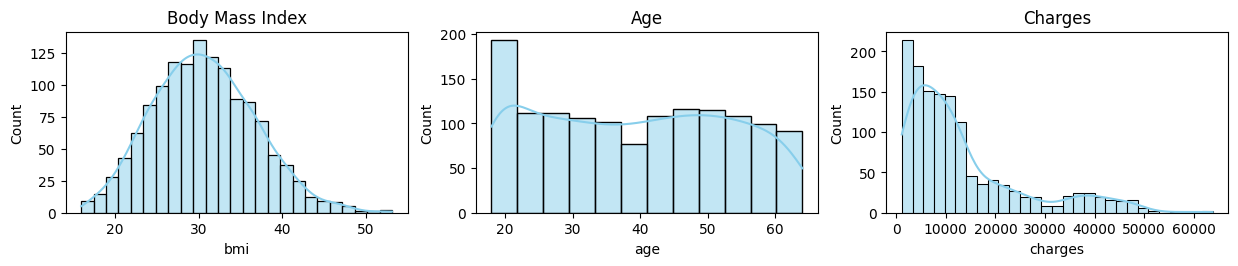

In [40]:
# Checking distrubition for continuous values
plt.figure(figsize=(15, 8))

plt.subplot(3, 3, 1)
sns.histplot(df['bmi'],color='skyblue', kde= True)
plt.title('Body Mass Index')

plt.subplot(3, 3, 2)
sns.histplot(df['age'], color = 'skyblue', kde= True)
plt.title('Age')

plt.subplot(3,3,3)
sns.histplot(df['charges'],color="skyblue", kde= True)
plt.title('Charges')

plt.show()

In [41]:
numerical_columns.head()

,age,bmi,children,charges,bmi_types,age_groups
0,19,27.900,0,16884.92400,Fat,Young Adults
1,18,33.770,1,1725.55230,Obese (type 1),Young Adults
2,28,33.000,3,4449.46200,Obese (type 1),Young Adults
3,33,22.705,0,21984.47061,Normal,Adult
4,32,28.880,0,3866.85520,Fat,Adult


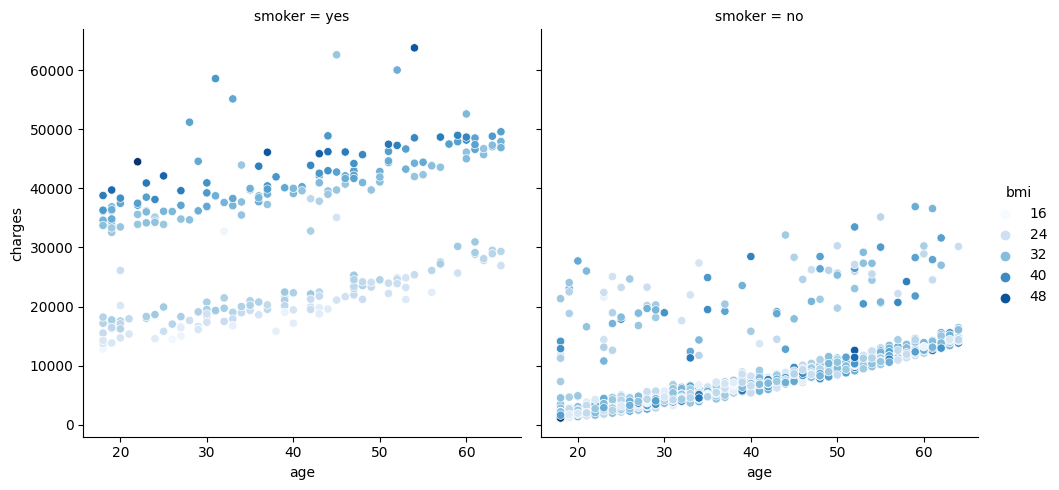

In [42]:
sns.relplot(data=df, kind='scatter', x='age', y='charges',col='smoker', hue='bmi', palette= ("Blues"))
plt.show()

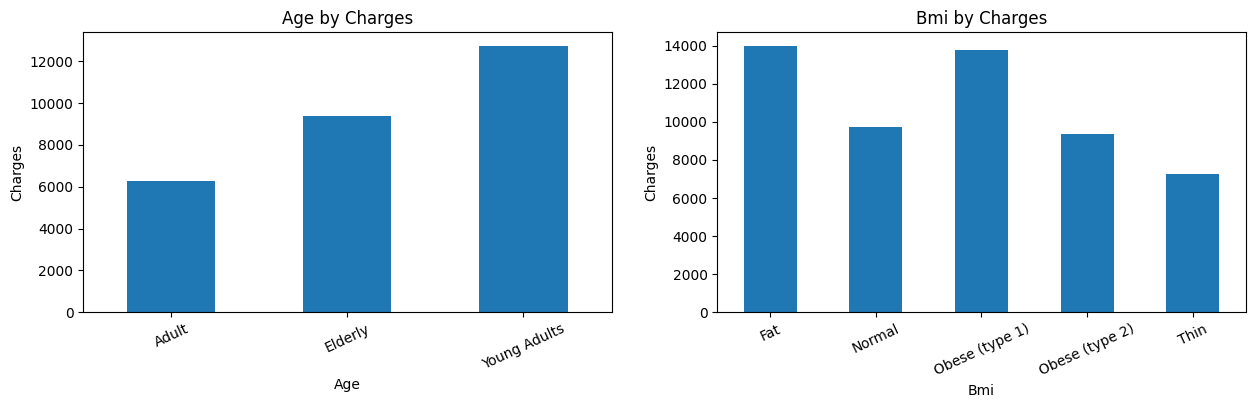

In [43]:
plt.figure(figsize=(15, 8))

plt.subplot(2,2,1)
numerical_columns.groupby(age_groups)['charges'].median().plot.bar()
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age by Charges')
plt.xticks(rotation = 25)  

plt.subplot(2,2,2)
numerical_columns.groupby(bmi_types)['charges'].median().plot.bar()
plt.xlabel('Bmi')
plt.ylabel('Charges')
plt.title('Bmi by Charges')
plt.xticks(rotation = 25) 

plt.show()

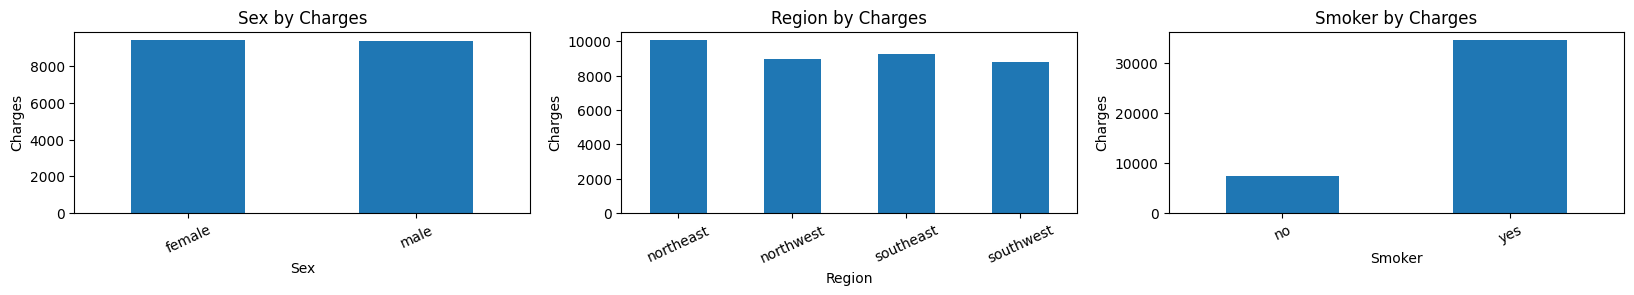

In [44]:
plt.figure(figsize=(20, 8))

plt.subplot(3,3,1)
df.groupby('sex')['charges'].median().plot.bar()
plt.xlabel('Sex')
plt.ylabel('Charges')
plt.title('Sex by Charges')
plt.xticks(rotation = 25)  

plt.subplot(3,3,2)
df.groupby('region')['charges'].median().plot.bar()
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('Region by Charges')
plt.xticks(rotation = 25) 


plt.subplot(3,3,3)
df.groupby('smoker')['charges'].median().plot.bar()
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('Smoker by Charges')
plt.xticks(rotation = 25) 
plt.show()

In [45]:
# Define categorical values
df['sex']=df['sex'].map({'male':0,'female':1})
df['smoker']=df['smoker'].map({'yes':1,'no':0})
df['region']=df['region'].map({'northwest':0, 'northeast':1,'southeast':2,'southwest':3})
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,0,21984.47061
4,32,0,28.880,0,0,0,3866.85520


## Model Development

In [50]:
scaler = MinMaxScaler()
df['charges_transformed'] = scaler.fit_transform(df[['charges']])
df.head(5)

,age,sex,bmi,children,smoker,region,charges,charges_transformed
0,19,1,27.900,0,1,3,16884.92400,0.251611
1,18,0,33.770,1,0,2,1725.55230,0.009636
2,28,0,33.000,3,0,2,4449.46200,0.053115
3,33,0,22.705,0,0,0,21984.47061,0.333010
4,32,0,28.880,0,0,0,3866.85520,0.043816


In [51]:
X = df[['bmi', 'children', 'sex', 'smoker', 'region','age']]
y = df['charges_transformed']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 2)

In [52]:
len(X_train)

1069

In [53]:
len(X_test)

268

In [54]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Ridge Regression': Ridge(alpha = 1 ),
    'Decision Tree Regression': DecisionTreeRegressor()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    print(f'{model_name}:')
    print(f'"Train Score:" {train_score:2f}')
    print(f'Test Score: {test_score:.2f}')
    print('----------------------------------------')

Linear Regression:
"Train Score:" 0.758378
Test Score: 0.71
----------------------------------------
Random Forest:
"Train Score:" 0.977165
Test Score: 0.83
----------------------------------------
Gradient Boosting:
"Train Score:" 0.911015
Test Score: 0.85
----------------------------------------
Ridge Regression:
"Train Score:" 0.758357
Test Score: 0.71
----------------------------------------
Decision Tree Regression:
"Train Score:" 1.000000
Test Score: 0.66
----------------------------------------
